In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
df = pd.read_csv("C:\Users\sivak\Downloads\archive (9)\spam.csv", encoding='latin-1')  # or whatever your dataset is named
print(df.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [3]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']


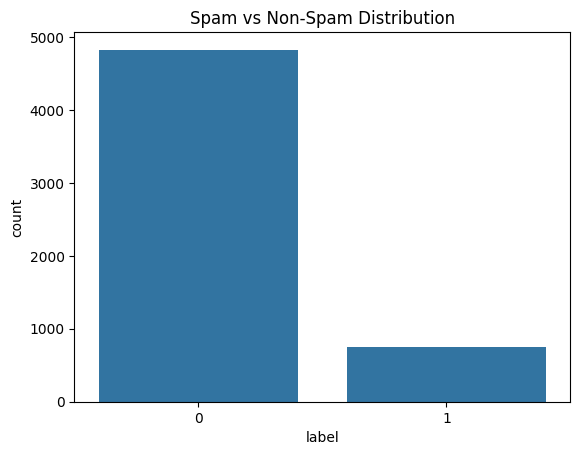

In [4]:
# Convert labels to binary values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Check balance
sns.countplot(x='label', data=df)
plt.title("Spam vs Non-Spam Distribution")
plt.show()


In [5]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

X = vectorizer.fit_transform(df['message'])
y = df['label']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [8]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.968609865470852
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
 [[965   0]
 [ 35 115]]


In [11]:
def predict_spam(text):
    text_vector = vectorizer.transform([text])
    prediction = model.predict(text_vector)
    return 'Spam' if prediction[0] == 1 else 'Not Spam'

# Test it!
print(predict_spam("Congratulations! You've won a lottery!"))
print(predict_spam("Hi Jan, let's catch up tomorrow."))


Not Spam
Not Spam
